In [1]:
# example of training a gan on mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets import mnist
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train: (60000, 28, 28)


In [4]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1]*train_X.shape[2])


In [5]:
print('X_train: ' + str(train_X.shape))
print('X_train: ' + str(train_X[1].shape))


X_train: (60000, 784)
X_train: (784,)


In [6]:
train_X = train_X/255


In [7]:
train_y


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
model=clf.fit(train_X, train_y)


In [10]:
model = BernoulliNB().fit(X,Y)


NameError: name 'X' is not defined

In [11]:
import numpy as np
prob= (np.exp(model.feature_log_prob_)[0])


In [12]:
prob


array([1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 3.37552743e-04,
       3.37552743e-04, 3.37552743e-04, 1.68776371e-04, 3.37552743e-04,
       3.37552743e-04, 3.37552743e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
      

In [13]:
gen_image = [0 if i < 0.5 else 1 for i in prob]
gen_image =np.array(gen_image)


<ipython-input-14-99c483064ee3>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


(-0.5, 27.5, 27.5, -0.5)

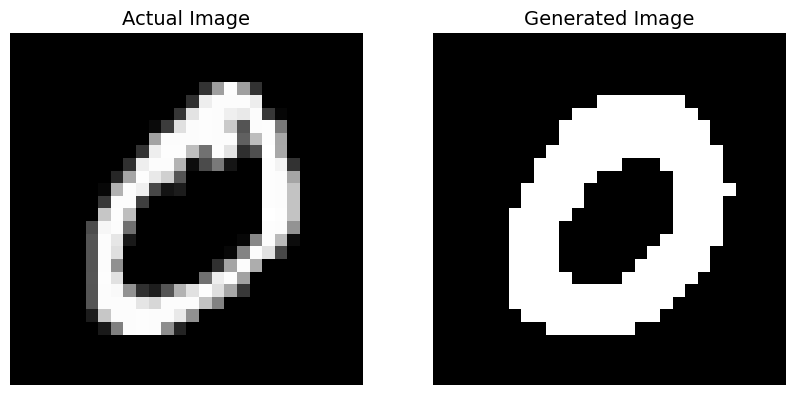

In [14]:
import matplotlib.pyplot as plt
# set up the canvas for the subplots
plt.figure(figsize=(10,10))
plt.axis('Off')
# image
plt.subplot(1,2,1)
plt.imshow(train_X[1].reshape(28,28),cmap='gray')
plt.title('Actual Image', fontsize=14)
plt.axis('off')
# image
plt.subplot(1,2,2)
plt.imshow(gen_image.reshape(28,28),cmap='gray')
plt.title('Generated Image', fontsize=14)
plt.axis('off')


In [16]:
!pip install imageio


In [17]:
import tensorflow as tf
import numpy as np
import math                     #data normalization
import matplotlib.pyplot as plt #plot images of outputs
import os                       # to read
import imageio                  # to create anim of outputs
from sklearn import preprocessing #for standardizing the dataset


In [18]:
(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape,y_train.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


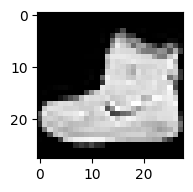

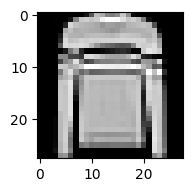

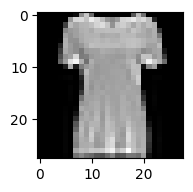

In [20]:
#plotting
for i in range(3):
  plt.subplot(1,3,1+i)   #2 rows, 5 cols, index of the image
  plt.imshow(x_train[i*5], cmap=plt.get_cmap('gray'))
  plt.show()




In [21]:
#Convert the train dataset into a 3D DATASET of stacked 3D images
image_width = x_train.shape[1];
x_train = np.reshape(x_train, [-1, image_width ,image_width , 1]).astype('float32')


In [22]:
#Check the shape of the data now
x_train.shape


(60000, 28, 28, 1)

In [23]:
# Normalize the images to [-1, 1] [Normalized Value = (value - mean)/mean]
x_train = (x_train - 127.5) / 127.5


In [24]:
#Generator Initializations
noise_length = 100


In [25]:
def create_generator_model(image_size=28, noise_input=100):

   #Create input layer
   input_layer = tf.keras.layers.Input(shape=(noise_input,))

   #First upsampling to 7X7X256
   #Increase dimensions and resize to 3D to feed it to Conv2DTranspose layer
   x = tf.keras.layers.Dense(7 * 7 * 256)(input_layer)
   x = tf.keras.layers.Reshape((7, 7, 256))(x)

   #Upscaling 1 : 128 filters, (2,2) stride
   #Input = 7X7X256
   #Output at this stage = 14X14X128
   #Syntax Note: kernel size can be specified as a tuple or integer or list
   x = tf.keras.layers.BatchNormalization()(x)
   x = tf.keras.layers.Activation('leaky_relu')(x)
   x = tf.keras.layers.Conv2DTranspose(128, (5,5), strides=2, padding='same')(x)

   #Upscaling 2
   #Input = 14X14X128
   #Output at this stage = 28X28X64
   x = tf.keras.layers.BatchNormalization()(x)
   x = tf.keras.layers.Activation('leaky_relu')(x)
   x = tf.keras.layers.Conv2DTranspose(64, kernel_size=[5,5], strides=2, padding='same')(x)

   #Upscaling 3
   #Input = 28X28X64
   #Output at this stage = 28X28X32
   x = tf.keras.layers.BatchNormalization()(x)
   x = tf.keras.layers.Activation('leaky_relu')(x)
   x = tf.keras.layers.Conv2DTranspose(32, kernel_size=[5,5], strides=1, padding='same')(x)

   #Upscaling 3
   #Input = 28X28X32
   #Output at this stage = 28X28X1
   #Note that we use tanh activation and not Leaky Relu for the last layer.
   x = tf.keras.layers.BatchNormalization()(x)
   x = tf.keras.layers.Activation('leaky_relu')(x)
   x = tf.keras.layers.Conv2DTranspose(1, kernel_size=[5,5], strides=1, padding='same')(x)

   x = tf.keras.layers.Activation('sigmoid')(x)
   #Create the model
   gen_network = tf.keras.models.Model(input_layer, x, name='gen_network')

   return gen_network


In [26]:
def create_discriminator_model(desc_data=[28,28,1,]):

   #A typical Convolution  network for classification is built
   disc_input = tf.keras.layers.Input(desc_data)
   #Input Dimension : 28X28X1
   #Output Dimension : 14X14X32
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(disc_input)
   x = tf.keras.layers.Conv2D(32, kernel_size=[5,5], strides=2, padding='same')(x)

   #Input Dimension : 14X14X32
   #Output Dimension : 7X7X64
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
   x = tf.keras.layers.Conv2D(64, kernel_size=[5,5], strides=2, padding='same')(x)

   #Input Dimension : 7X7X64
   #Output Dimension : 4X4X128
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
   x = tf.keras.layers.Conv2D(128, kernel_size=[5,5], strides=2, padding='same')(x)

   #Input Dimension : 4X4X128
   #Output Dimension : 4X4X256
   x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
   x = tf.keras.layers.Conv2D(256, kernel_size=[5,5], strides=1, padding='same')(x)

   #Input Dimension : Flattened(4X4X256)
   #Output Dimension : 1
   #Flatten the output and build an output layer
   x = tf.keras.layers.Flatten()(x)
   x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

   #Build Model
   disc_network = tf.keras.models.Model(disc_input, x, name='disc_network')

   return disc_network


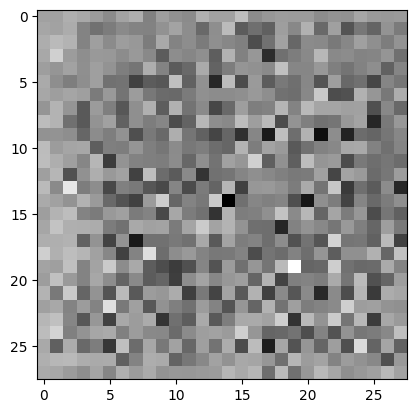

In [27]:
generator = create_generator_model()
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')


In [28]:
#This code will check the functioning of the descriminator against a sample input. As of this point,
#the descriminator is untrained.
discriminator = create_discriminator_model()
decision = discriminator(generated_image)
print (decision)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


tf.Tensor([[0.5043127]], shape=(1, 1), dtype=float32)


In [36]:
def build_models():

   noise_size = 100
   lr = 2e-4
   decay = 6e-8

   #Build Base Discriminator model
   base_discriminator = create_discriminator_model(desc_data=(28,28,1,))

   #Define optimizer and compile model
   discriminator = tf.keras.models.Model(inputs=base_discriminator.inputs,
                                         outputs=base_discriminator.outputs)
   # Pass learning rate as 'learning_rate'
   optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr, decay=decay)
   discriminator.compile(loss='binary_crossentropy',
                         optimizer=optimizer,
                         metrics=['accuracy'])

   #Build Generator model
   generator = create_generator_model(image_size=28, noise_input=noise_size)

   #Build Frozen Discriminator
   frozen_discriminator = tf.keras.models.Model(inputs=base_discriminator.inputs,
                                         outputs=base_discriminator.outputs)
   #Freeze the weights of discriminator during adversarial training
   frozen_discriminator.trainable = False
   #Build Adversarial model
   # Pass learning rate as 'learning_rate'
   optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr * 0.5, decay=decay * 0.5)
   #Adversarial = generator + discriminator
   adversarial = tf.keras.models.Model(generator.input,
                       frozen_discriminator(generator.output))

   adversarial.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy'])

   return generator, discriminator, adversarial

In [37]:
def train_gan(generator, discriminator, adversarial, noise_size=100):

   #Training parameters
   batch_size = 64
   train_steps = 10000   # we are going for 10000 Steps of training
   image_size = 28

   #FASHION MNIST DATASET
   (x_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

   #Convert the train dataset into a DATASET of stacked 3D images Dimension: (60000,28,28,1)
   x_train = np.reshape(x_train, [-1, image_size, image_size, 1]).astype('float32')

   #Standardize data : 0 to 1
   x_train = x_train / 255

   #Input for testing generator at different intervals, we will generate 16 images
   test_noise_input = np.random.uniform(-1.0,1.0, size=[16, noise_size])

   #Start training
   for i in range(train_steps):

       #Train the DISCRIMATOR

       #Step 1. Get images generated by Generator N/W (Fake Images)
       noise_input = np.random.uniform(-1.0,1.0, size=[batch_size, noise_size])
       fake_images = generator.predict(noise_input)

       #Step 2. Get images from actual  training set (Real Images)
       img_indexes = np.random.randint(0, x_train.shape[0], size=batch_size)
       real_images = x_train[img_indexes]

       #Step 3. Prepare input for training Discriminator
       X = np.concatenate((real_images, fake_images))

       #4. Labels for training
       y_real = np.ones((batch_size, 1))
       y_fake = np.zeros((batch_size, 1))
       y = np.concatenate((y_real, y_fake))

       #5. Train the Discriminator Network
       # The train_on_batch() method Runs a single gradient update on a single batch of data.
       d_loss, d_acc = discriminator.train_on_batch(X, y)

       # Now we have updated discriminator weights.We will freeze the discriminator weights to
       #train the adversarial network

       #Train ADVERSARIAL Network

       #1. Prepare input - create a new batch of noise
       X = noise_input = np.random.uniform(-1.0,1.0, size=[batch_size, noise_size])

       #2. Prepare labels - training Adversarial network to lie :) - All 1s
       y = np.ones((batch_size, 1))

       #3. Train - Pls note Discrimator is not getting trained here
       a_loss, a_acc = adversarial.train_on_batch(X, y)

       if i % 100 == 0:
           #Print loss and Accuracy for both networks
           print("%s [Discriminator loss: %f, acc: %f, Adversarial loss: %f, acc: %f]" % (i, d_loss, d_acc, a_loss, a_acc) )

       #Save generated images to see how well Generator is doing
       if (i+1) % 500 == 0:

           #Generate 16 images
           fake_images = generator.predict(test_noise_input)

           #Display images
           plot_images(fake_images, i+1)

   #Save Generator model
   generator.save('fashionmnist_generator_dcgan.h5')


In [38]:
def plot_images(fake_images, step):

   plt.figure(figsize=(2.5,2.5))
   num_images = fake_images.shape[0]

   image_size = fake_images.shape[1]
   rows = int(math.sqrt(fake_images.shape[0]))

   for i in range(num_images):
       plt.subplot(rows, rows, i + 1)
       image = np.reshape(fake_images[i], [image_size, image_size])
       plt.imshow(image, cmap='gray')
       plt.axis('off')
   plt.show()


In [39]:
# prompt: recitfy this code block
# G, D, A = build_models()

G, D, A = build_models()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [40]:
G.summary()


Model: "gen_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 12544)               │       1,266,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 14, 14, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 28, 28, 64)          │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 28, 28, 32)          │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 28, 28, 1)           │             801 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,345,089 (8.95 MB)

 Trainable params: 2,344,129 (8.94 MB)

 Non-trainable params: 960 (3.75 KB)

In [41]:
D.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_16 (LeakyReLU)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_17 (LeakyReLU)           │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 7, 7, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18 (LeakyReLU)           │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 4, 4, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_19 (LeakyReLU)           │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,080,577 (4.12 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,080,577 (4.12 MB)

In [42]:
A.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 12544)               │       1,266,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 14, 14, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 28, 28, 64)          │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 28, 28, 32)          │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 28, 28, 1)           │             801 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_4 (Functional)            │ (None, 1)                   │       1,080,577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,425,666 (13.07 MB)

 Trainable params: 2,344,129 (8.94 MB)

 Non-trainable params: 1,081,537 (4.13 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 569ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [Discriminator loss: 0.691954, acc: 0.773438, Adversarial loss: 0.695621, acc: 0.281250]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 408ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

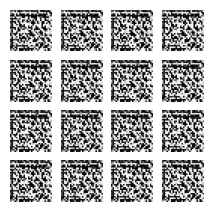

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
500 [Discriminator loss: 0.724311, acc: 0.385167, Adversarial loss: 0.589665, acc: 0.998129]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 384ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
2/2 ━━━━━━

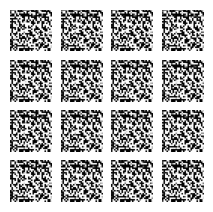

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1000 [Discriminator loss: 0.754224, acc: 0.350930, Adversarial loss: 0.563642, acc: 0.999063]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 356ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step


In [ ]:
train_gan(G, D, A)


In [1]:
import glob
import imageio
anim_file = 'dcfashiongan.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
 filenames = glob.glob('D:\Sups\Python\GAN\FASHION_mnist\*.png')
 filenames = sorted(filenames)
 for filename in filenames:
   image = imageio.imread(filename)
   writer.append_data(image)
 image = imageio.imread(filename)
 writer.append_data(image)


NameError: name 'filename' is not defined